# Mall Customer Dataset

In [1]:
#importing modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

#### 1. Loading the Dataset

In [4]:
#Load Dataset
DS_2 = pd.read_csv("Mall_Customers.csv")
print (DS_2.columns)
DS_2.head(10)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


#### 2.Descriptive Statistics

In [5]:
#Some data Stats
DS_2.shape # Shape
DS_2.info() # information
DS_2.describe() #Summary Stastics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### 3. Missing Values identification and handling

In [6]:
#Looking out for missing values and handling them
DS_2.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
#finding out unique variables

print("Gender : ",DS_2.Gender.unique())
print("Age : ",DS_2.Age.unique())
print("Annual Income : ",DS_2['Annual Income (k$)'].unique())
print("Spending Score : ",DS_2['Spending Score (1-100)'].unique())

Gender :  ['Male' 'Female']
Age :  [19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 55 34 66 39 44
 28 56 41]
Annual Income :  [ 15  16  17  18  19  20  21  23  24  25  28  29  30  33  34  37  38  39
  40  42  43  44  46  47  48  49  50  54  57  58  59  60  61  62  63  64
  65  67  69  70  71  72  73  74  75  76  77  78  79  81  85  86  87  88
  93  97  98  99 101 103 113 120 126 137]
Spending Score :  [39 81  6 77 40 76 94  3 72 14 99 15 13 79 35 66 29 98 73  5 82 32 61 31
 87  4 92 17 26 75 36 28 65 55 47 42 52 60 54 45 41 50 46 51 56 59 48 49
 53 44 57 58 43 91 95 11  9 34 71 88  7 10 93 12 97 74 22 90 20 16 89  1
 78 83 27 63 86 69 24 68 85 23  8 18]


In [8]:
numerical = ['Age','Annual Income (k$)','Spending Score (1-100)']
categorical = ['Gender']
unused = ['CustomerID']

DS_2 = DS_2.drop(columns = unused)
DS_2.shape

(200, 4)

In [9]:
for cat in categorical:
    DS_2[cat] = DS_2[cat].fillna(DS_2[cat].mode().values[0])
DS_2.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### 4. Visualize

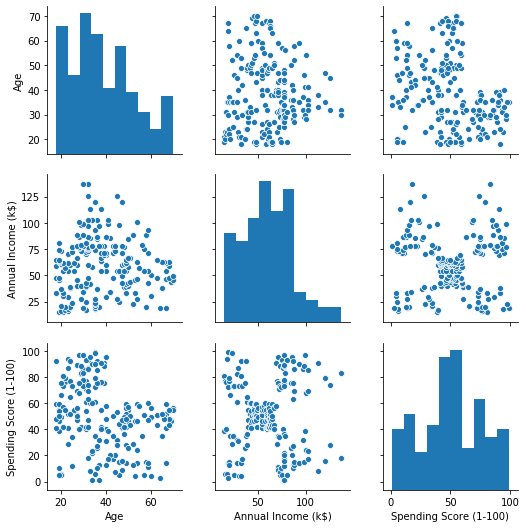

In [11]:
sns.pairplot(DS_2)

The above diagram shows pairplot of all the numerical features.

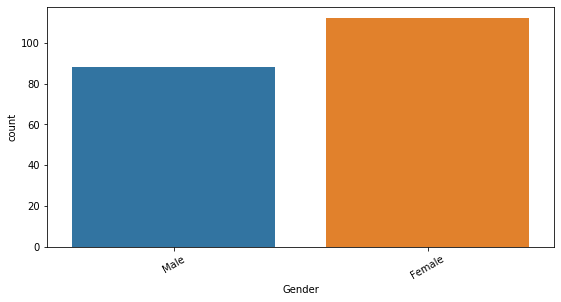

In [12]:
fig = plt.figure(figsize = (20,15))
axes = 320
for cat in categorical:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = DS_2, x = cat)
    plt.xticks(rotation=30)
plt.show()

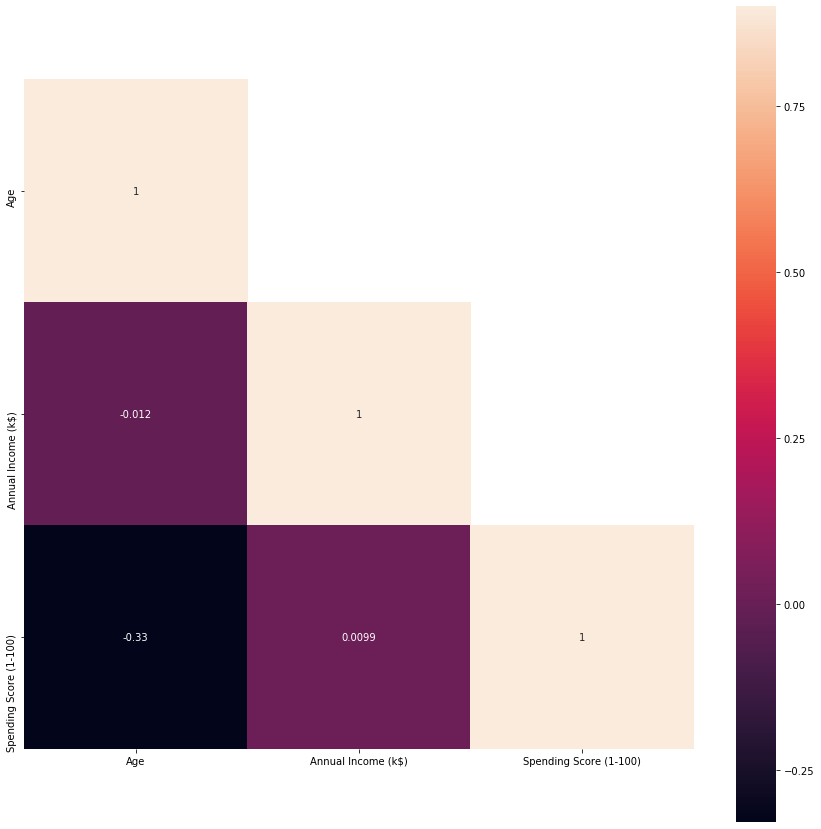

In [13]:
#create correlation
corr = DS_2.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

The heatmap shows best correlation between credit amount and duration.

In [14]:
DS_2_cluster = pd.DataFrame()
DS_2_cluster['Age'] = DS_2['Age']
DS_2_cluster['Annual Income (k$)'] = DS_2['Annual Income (k$)']
DS_2_cluster['Spending Score (1-100)'] = DS_2['Spending Score (1-100)']
DS_2_cluster.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


Plotting Box plots to find outliers - The box plot shows outliers in the numerical features

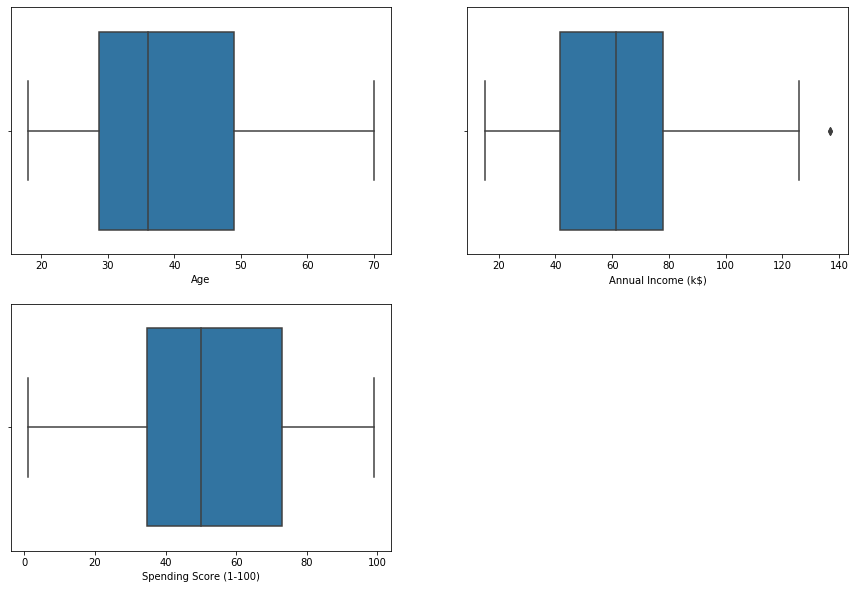

In [15]:
fig = plt.figure(figsize = (15,10))
axes = 220
for num in numerical:
    axes += 1
    fig.add_subplot(axes)
    sns.boxplot(data = DS_2, x = num)
plt.show()

No handles with labels found to put in legend.


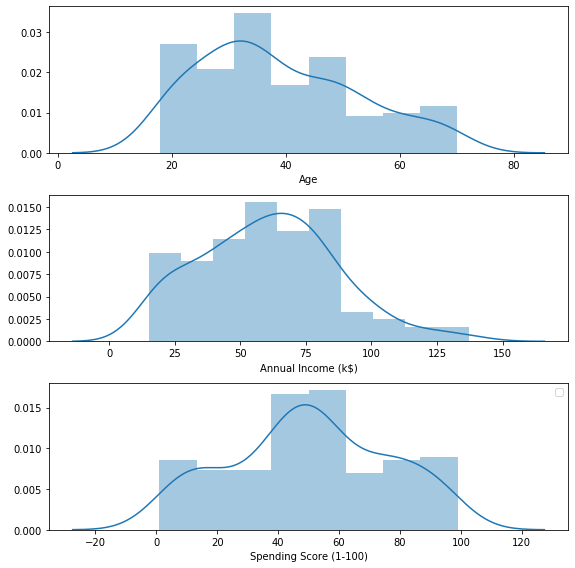

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
sns.distplot(DS_2["Age"], ax=ax1)
sns.distplot(DS_2["Annual Income (k$)"], ax=ax2)
sns.distplot(DS_2["Spending Score (1-100)"], ax=ax3)

plt.tight_layout()
plt.legend()

### Positive Skewness
means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode.

In [15]:
#Feature Engineering
## Log Transform
#We can use logarithmic transformation to reduce the outliers and distribution skewness

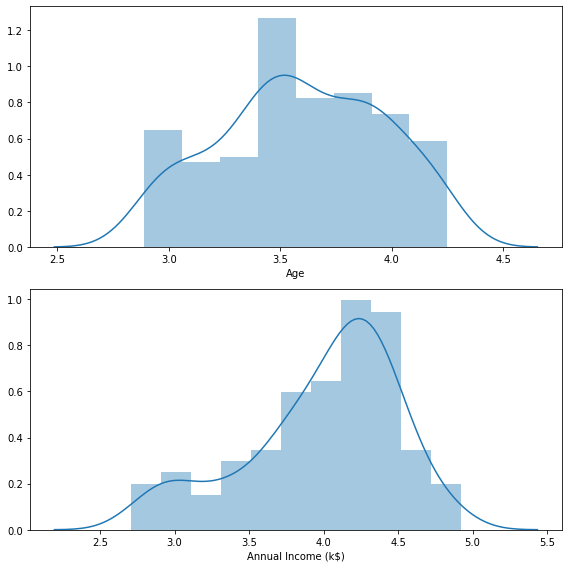

In [22]:
DS_2_cluster_log = np.log(DS_2_cluster[['Age', 'Annual Income (k$)']])

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))
sns.distplot(DS_2_cluster_log["Age"], ax=ax1)
sns.distplot(DS_2_cluster_log["Annual Income (k$)"], ax=ax2)
plt.tight_layout()


This has caused the skewness to be removed.

In [23]:
#Fit and transform
DS_2_cluster_log.head()

,Age,Annual Income (k$)
0,2.944439,2.708050
1,3.044522,2.708050
2,2.995732,2.772589
3,3.135494,2.772589
4,3.433987,2.833213


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(DS_2_cluster_log)

#### 6. Models

1- K-means
 
2- Hierarichical Agglomerative Clustering

3- DBSCAN

K-means
First we use the Elbow Method to determine the optimal k value for the k-means

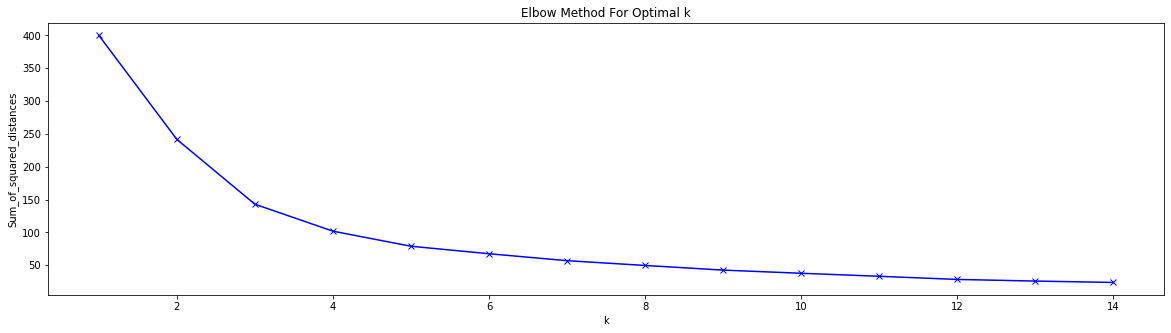

In [25]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_scaled)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


From the figure above we can see that the most optimal values are 3. So we choose 3 as the k values of the k-means model.

K-Means


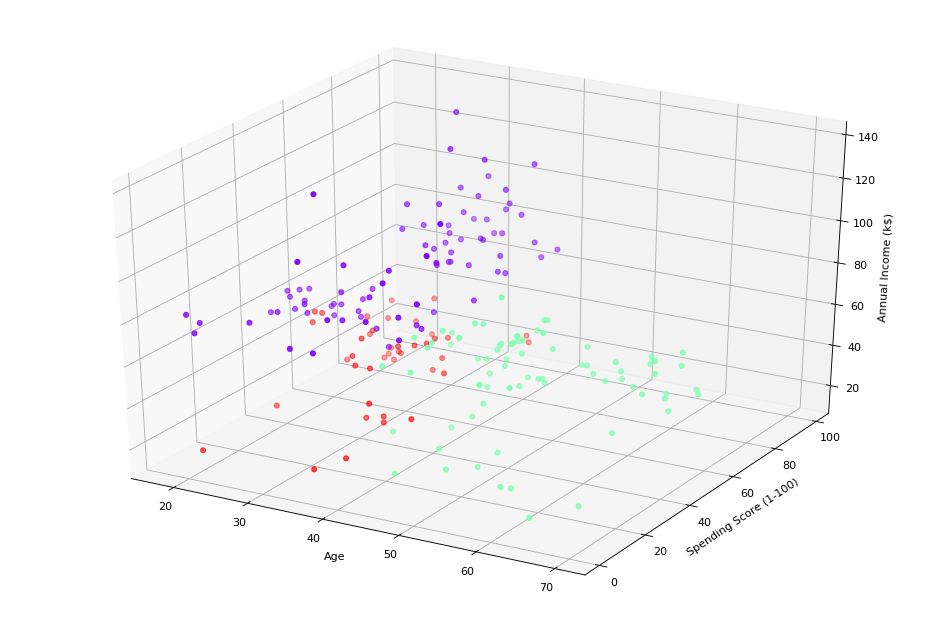

In [41]:
from mpl_toolkits.mplot3d import Axes3D

model = KMeans(n_clusters=3)
model.fit(cluster_scaled)
kmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(DS_2_cluster['Age'],DS_2_cluster['Spending Score (1-100)'],DS_2_cluster['Annual Income (k$)'],c=kmeans_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Spending Score (1-100)', linespacing=3.1)
zLabel = ax.set_zlabel('Annual Income (k$)', linespacing=3.4)
print("K-Means")

In [29]:
DS2_clustered_kmeans = DS_2_cluster.assign(Cluster=kmeans_labels)
grouped_kmeans = DS2_clustered_kmeans.groupby(['Cluster']).mean().round(1)
grouped_kmeans

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,54.1,54.4,37.8
1,27.0,29.1,61.1
2,31.3,81.0,55.7


The table shows centroids of each clusters that could determine the clusters rule.
These are:

Cluster 1: Higher credit amount, middle-aged, long duration customers

Cluster 0: Lower credit amount, young, short duration customers

Cluster 2: Lower Credit amount,old,short duration customers
    

### 6.2. Hierarchical Agglomerative Clustering¶


On this model, to determine the n_clusters we can use dendogram.

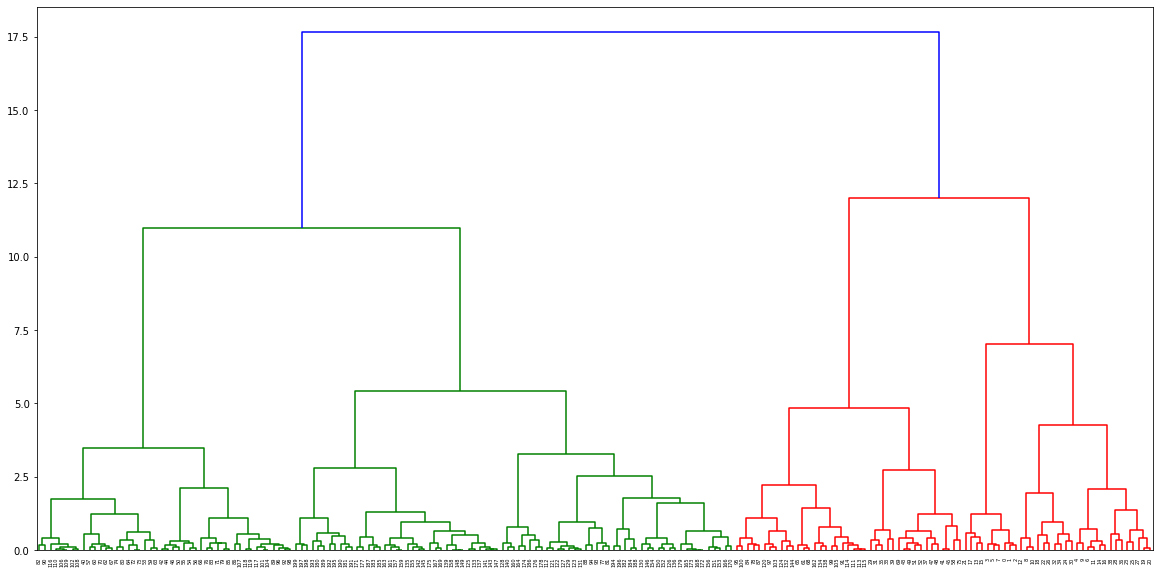

In [30]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(cluster_scaled, method='ward'))

Hierarchical Agglomerative Clustering


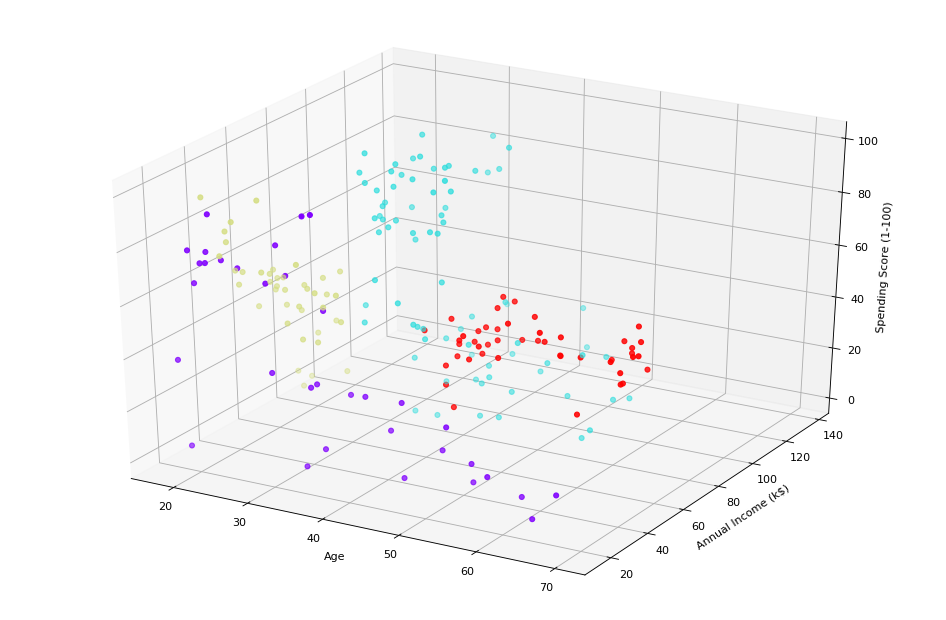

In [33]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4)
model.fit(cluster_scaled)
hac_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(DS_2_cluster['Age'],DS_2_cluster['Annual Income (k$)'],DS_2_cluster['Spending Score (1-100)'],c=hac_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Annual Income (k$)', linespacing=3.1)
zLabel = ax.set_zlabel('Spending Score (1-100)', linespacing=3.4)
print("Hierarchical Agglomerative Clustering")

In [34]:
DS2_clustered_hac = DS_2_cluster.assign(Cluster=hac_labels)
grouped_hac = DS2_clustered_hac.groupby(['Cluster']).mean().round(1)
grouped_hac

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,36.9,23.0,43.8
1,37.7,85.1,53.2
2,23.5,52.9,51.5
3,56.0,53.1,48.6


The table above shows the centroid of each clusters that could determine the clusters rule. These are:

Cluster 0 : Higher credit amount, old, long duration customers

Cluster 1 : Lower credit amount, young, long duration customers

Cluster 2 : Lower credit amount, old, short duration customers

Cluster 3 : Lower credit amount, young, short duration customers

### 6.3. DBSCAN


DBSCAN


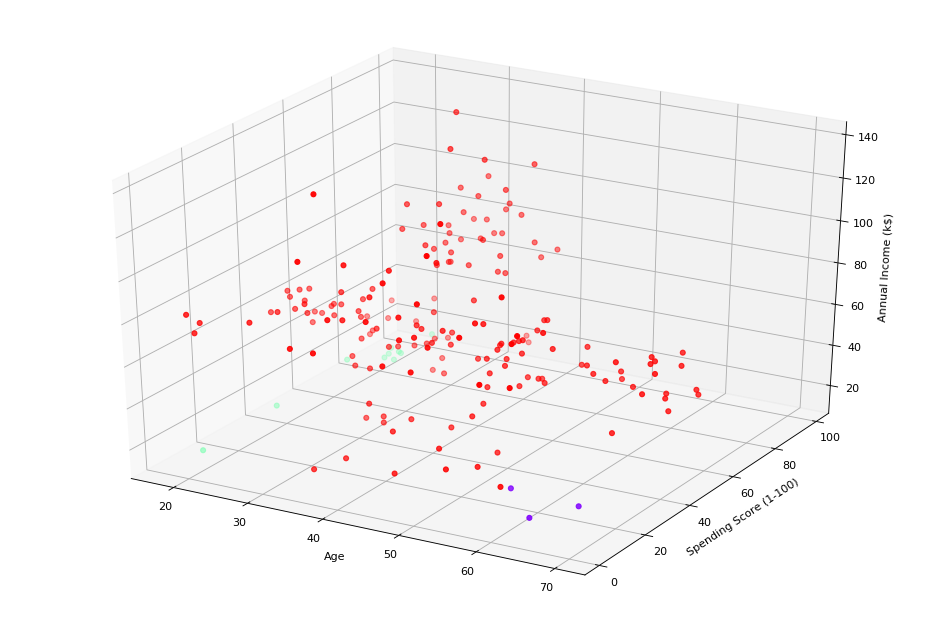

In [36]:
from sklearn.cluster import DBSCAN

model = DBSCAN()
model.fit(cluster_scaled)
dbs_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(DS_2_cluster['Age'],DS_2_cluster['Spending Score (1-100)'],DS_2_cluster['Annual Income (k$)'],c=dbs_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Spending Score (1-100)', linespacing=3.1)
zLabel = ax.set_zlabel('Annual Income (k$)', linespacing=3.4)
print("DBSCAN")

From the figure above we can see that DBSCAN is not suitable for this dataset.


### 7. Result Analysis

From these models, we can choose the most well segmented model, that is k-means. We use the clusters from the that model to analyze the dataset.'

Looking back from the centroid of the clusters, let's see the "returning power" of each of the centroid by dividing the Credit amount with the duration. The higher the "returning power".

In [37]:
grouped_kmeans

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,54.1,54.4,37.8
1,27.0,29.1,61.1
2,31.3,81.0,55.7


In [38]:
df_clustered = DS_2.assign(Cluster=kmeans_labels)
df_clustered.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


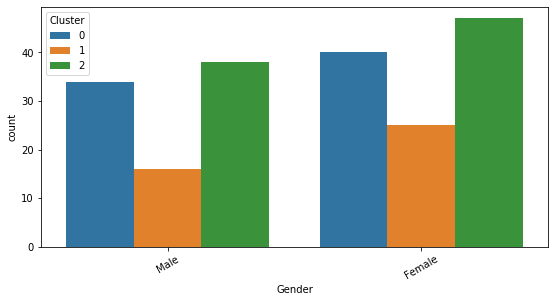

In [39]:
fig = plt.figure(figsize = (20,15))
axes = 320
for cat in categorical:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = df_clustered, hue=df_clustered['Cluster'], x = cat)
    plt.xticks(rotation=30)
plt.show()

Above are figures of the clusters distribution on each categorical feature.



#### Summaries

After comparing three kind of clustering models, we decide to use k-means as the model
The data divided into three clusters
The three clusters can be used to determine the creditworthiness of the German Credit potential borrowers
Each of the cluster have their own characteristics